# Tugas Klasifikasi (Data Mining 2)

# Latar Belakang

Analisis prediksi perilaku pelanggan dalam sebuah toko online dapat memberikan keuntungan yang signifikan. Dalam konteks ini, mengetahui kemungkinan seorang pengunjung akan melakukan pembelian memungkinkan penyesuaian strategi penjualan. Misalnya, untuk pelanggan dengan peluang tinggi melakukan pembelian, toko dapat menawarkan produk-produk populer untuk mendorong upselling. Sebaliknya, untuk pelanggan dengan kemungkinan rendah, kupon atau insentif lain bisa diberikan guna meningkatkan motivasi belanja. Prediksi ini menggunakan metode data mining, yang memungkinkan analisis data besar dan memberikan jawaban prediktif mengenai peluang suatu pembelian secara efisien. Dalam kompetisi DATA MINING CUP (DMC) 2013, tujuan utamanya adalah untuk meramalkan apakah pengunjung akan melakukan pembelian berdasarkan data sesi dan transaksi historis.

## Tujuan:
1. Membangun model prediksi pesanan menggunakan data sesi historis.
2. Mengenali pola perilaku pelanggan yang meningkatkan kemungkinan pembelian.
3. Menghasilkan prediksi probabilitas (0 hingga 1) untuk setiap sesi, di mana 0 menunjukkan tidak ada pesanan dan 1 menunjukkan pesanan dilakukan.
4. Meminimalkan kesalahan prediksi untuk mendekati hasil aktual.
5. Mendukung optimalisasi strategi toko online guna meningkatkan konversi dan pengalaman belanja pelanggan.

 # Steps of Preprocessing of Data
1. Import library yang diperlukan
2. Read Dataset
3. Pra-Proses
4. Exploratory Data Analysis(EDA)
5. Penanganan Missing Value
6. Penanganan Outliers
7. Penanganan Duplikat dan Garbage value
8. Prediksi

# 1. Import library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
from copy import deepcopy
import plotly.express as px
warnings.filterwarnings('ignore')

# 2. DATASET YANG DIGUNAKAN

## transact_train
* Deskripsi: File ini adalah data pelatihan yang berisi semua kolom (data arrays) yang dijelaskan dalam dokumen features.pdf, termasuk kolom target order.

* Kolom order: Kolom order menunjukkan apakah sesi tersebut menghasilkan pembelian (y untuk pembelian, n untuk tidak ada pembelian). Ini merupakan target yang ingin diprediksi.

* Kegunaan: Digunakan untuk melatih model. Model akan belajar dari data ini untuk memahami pola-pola yang mengarah pada terjadinya atau tidak terjadinya pembelian.


In [2]:
transact_train = pd.read_csv('DMC\\transact_train.txt', sep='|')

In [3]:
transact_train.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y


Diatas merupakan data awal yang ada pada dataset, untuk memastikan bahwa data telah dimuat dengan benar dan untuk melihat struktur serta isi kolom-kolom pada dataset tersebut.

In [4]:
transact_train.tail()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
429008,49998,18,7,5988.882,77,9.99,149.99,5253.28,3,49.95,...,?,?,?,?,?,?,?,?,?,n
429009,49999,18,7,675.114,6,59.0,199.99,509.96,1,89.99,...,?,25038,?,?,?,0,24,1,4,n
429010,49999,18,7,715.341,7,59.0,649.99,1159.95,1,89.99,...,completely orderable,25038,?,?,?,0,24,1,4,n
429011,50000,18,7,0.000,1,6.99,6.99,6.99,1,6.99,...,?,47,300,537,5,0,53,1,34,n
429012,50000,18,7,82.943,1,6.99,6.99,6.99,1,6.99,...,completely orderable,47,300,537,5,0,53,1,34,n


5 baris terakhir dari dataset transact_train. Kita bisa mendapatkan gambaran umum tentang struktur data di bagian terakhir untuk memastikan bahwa data tersebut terorganisir dengan baik.

In [5]:
# Dimensi Data
transact_train.shape

(429013, 24)

Ukuran dataset terdiri dari 429013 baris dan 24 kolom

In [6]:
transact_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

Diatas merupakan informasi umum dari struktur dataset secara keseluruhan.

### Dokumentasi Field Dataset

|No | Nama Kolom | Deskripsi    | Rentang Nilai | Missing Value |
|:-:|:-----------|:-------------|:--------------|:--------------|
|1| sessionNo  | Nomor urut sesi | Bilangan Asli | Tidak  |
|2| startHours | Jam dimulainya sesi | Bilangan asli antara 0 dan 23 | Tidak |
|3| startWeekday| Hari saat sesi dimulai (1=Senin, ..., 7=Minggu) | Bilangan asli dalam {1, 2, 3, 4, 5, 6, 7} | Tidak |
|4| duration| Durasi dalam detik sejak sesi dimulai      | Bilangan desimal tak-negatif        | Tidak |
|5| cCount | Jumlah produk yang diklik | Bilangan asli | Tidak |
|6| cMinPrice | Harga terendah dari produk yang diklik | Bilangan desimal tak-negatif | Ya |
|7| cMaxPrice | Harga tertinggi dari produk yang diklik | Bilangan desimal tak-negatif | Ya |
|8| cSumPrice | Jumlah harga dari semua produk yang diklik | Bilangan desimal tak-negatif | Ya |
|9| bCount | Jumlah produk yang dimasukkan ke keranjang | Bilangan asli | Tidak |
|10| bMinPrice | Harga terendah dari produk di keranjang | Bilangan desimal tak-negatif | Ya |
|11| bMaxPrice | Harga tertinggi dari produk di keranjang | Bilangan desimal tak-negatif | Ya |
|12| bSumPrice | Jumlah harga dari semua produk di keranjang | Bilangan desimal tak-negatif | Ya |
|13| bStep | Langkah pemrosesan pembelian | Bilangan asli dalam {1, 2, 3, 4, 5} | Ya |
|14| onlineStatus | Status online pelanggan (y=ya, n=tidak) | String | Ya |
|15| availability | Status pengiriman | String | Ya |
|16| customerID | ID pelanggan | String | Ya |
|17| maxVal | Harga pembelian maksimum yang diperbolehkan untuk pelanggan | Bilangan asli | Ya |
|18| customerScore | Evaluasi pelanggan dari sudut pandang toko | Bilangan asli | Ya |
|19| accountLifetime | Lama akun pelanggan dalam bulan | Bilangan asli | Ya |
|20| payments | Jumlah pembayaran yang dilakukan oleh pelanggan | Bilangan asli | Ya |
|21| age | Usia pelanggan | Bilangan asli | Ya |
|22| address | Bentuk sapaan pelanggan (1=Tuan, 2=Ny, 3=Perusahaan) | Bilangan asli dalam {1, 2, 3} | Ya |
|23| lastOrder | Waktu dalam hari sejak pesanan terakhir | Bilangan asli | Ya |
|24| order | Hasil sesi (y=pembelian, n=tidak ada pembelian) | Karakter | Tidak |

In [7]:
transact_train['sessionNo'] = transact_train['sessionNo'].astype(int)
transact_train['startHour'] = transact_train['startHour'].astype(int)
transact_train['startWeekday'] = transact_train['startWeekday'].astype(int)
transact_train['duration'] = transact_train['duration'].astype(float)
transact_train['cCount'] = transact_train['cCount'].astype(int)
transact_train['cMinPrice'] = pd.to_numeric(transact_train['cMinPrice'], errors='coerce')
transact_train['cMaxPrice'] = pd.to_numeric(transact_train['cMaxPrice'], errors='coerce')
transact_train['cSumPrice'] = pd.to_numeric(transact_train['cSumPrice'], errors='coerce')
transact_train['bCount'] = transact_train['bCount'].astype(int)
transact_train['bMinPrice'] = pd.to_numeric(transact_train['bMinPrice'], errors='coerce')
transact_train['bMaxPrice'] = pd.to_numeric(transact_train['bMaxPrice'], errors='coerce')
transact_train['bSumPrice'] = pd.to_numeric(transact_train['bSumPrice'], errors='coerce')
transact_train['bStep'] = pd.to_numeric(transact_train['bStep'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['onlineStatus'] = transact_train['onlineStatus'].astype('category')
transact_train['availability'] = transact_train['availability'].astype('category')
transact_train['customerNo'] = transact_train['customerNo'].astype('string')
transact_train['maxVal'] = pd.to_numeric(transact_train['maxVal'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['customerScore'] = pd.to_numeric(transact_train['customerScore'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['accountLifetime'] = pd.to_numeric(transact_train['accountLifetime'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['payments'] = pd.to_numeric(transact_train['payments'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['age'] = pd.to_numeric(transact_train['age'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['address'] = pd.to_numeric(transact_train['address'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['lastOrder'] = pd.to_numeric(transact_train['lastOrder'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['order'] = transact_train['order'].astype('category')


Selanjutnya, dengan kode tersebut kolom kolom yang tipe datanya tidak sesuai diubah manjadi tipe data yang sesuai. 
- kolom cMinPrice dari string ke float
- kolom cMaxPrice dari string ke float
- kolom cSumPrice dari string ke float
- kolom bMinPrice dari string ke float
- kolom bMaxPrice dari string ke float
- kolom bSumPrice dari string ke float
- kolom bStep dari string ke int
- kolom onlineStatus dari string ke category
- kolom availability dari string ke category
- kolom maxVal dari string ke int
- kolom customerScore dari string ke int
- kolom accountLifetime dari string ke int
- kolom payments dari string ke int
- kolom age dari string ke int
- kolom address dari string ke int
- kolom lastOrder dari string ke int
- kolom order dari string ke category

In [8]:
transact_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   sessionNo        429013 non-null  int32   
 1   startHour        429013 non-null  int32   
 2   startWeekday     429013 non-null  int32   
 3   duration         429013 non-null  float64 
 4   cCount           429013 non-null  int32   
 5   cMinPrice        426248 non-null  float64 
 6   cMaxPrice        426248 non-null  float64 
 7   cSumPrice        426248 non-null  float64 
 8   bCount           429013 non-null  int32   
 9   bMinPrice        423883 non-null  float64 
 10  bMaxPrice        423883 non-null  float64 
 11  bSumPrice        423883 non-null  float64 
 12  bStep            237680 non-null  Int64   
 13  onlineStatus     429013 non-null  category
 14  availability     429013 non-null  category
 15  customerNo       429013 non-null  string  
 16  maxVal           275

Diatas ialah informasi mengenai kolom yang tipe datanya sudah diubah

In [9]:
data_train = deepcopy(transact_train)

Kemudian kita membuat salinan DataFrame transact_train dan menyimpannya dalam variabel data_train.

# 3. Pra-Proses

## Cek jumlah dan persentase missing value

In [10]:
data_train = data_train.replace('?', None)

Lalu kita mengganti setiap nilai pada kolom yang bernilai '?' menjadi None

In [11]:
print('Jumlah Missing Value')
print(data_train.isnull().sum())

print()

print('Persentase Missing Value')
print(data_train.isnull().sum()/data_train.shape[0] * 100)

Jumlah Missing Value
sessionNo               0
startHour               0
startWeekday            0
duration                0
cCount                  0
cMinPrice            2765
cMaxPrice            2765
cSumPrice            2765
bCount                  0
bMinPrice            5130
bMaxPrice            5130
bSumPrice            5130
bStep              191333
onlineStatus       160379
availability       165255
customerNo         151098
maxVal             153740
customerScore      153740
accountLifetime    153740
payments           151098
age                151396
address            151098
lastOrder          151098
order                   0
dtype: int64

Persentase Missing Value
sessionNo           0.000000
startHour           0.000000
startWeekday        0.000000
duration            0.000000
cCount              0.000000
cMinPrice           0.644503
cMaxPrice           0.644503
cSumPrice           0.644503
bCount              0.000000
bMinPrice           1.195768
bMaxPrice           1.1957

Diatas adalah informasi mengenai missing value dari setiap kolom, bisa dilihat berdasarkan informasi di atas ada beberapa kolom yang perlu di perbaiki missing valuenya.

## Grouping Dataset berdasarkan sesi

In [12]:
def groupData(data, field):
    grouped = data.groupby(field)
    splitted = [group for _, group in grouped]
    return splitted

In [13]:
splitted = groupData(data_train, 'sessionNo')

Selanjutnya kami mengelompokkan data berdasarkan sessionNo. Hasil pengelompokan ini dipecah menjadi beberapa bagian, di mana setiap bagian berisi data yang hanya terkait dengan satu nilai unik dari kolom tersebut. Keluaran akhirnya berupa daftar yang berisi setiap kelompok data tersebut, sehingga mudah diakses atau dianalisis per sessionnya.

## Mengakses Data pada Sesi Tertentu

In [14]:
def get_session_data(splitted, n):
    return splitted[n-1]

In [15]:
# Contoh penggunaan:
get_session_data(splitted, 2) #menampilkan data sesi ke 2

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y
5,2,6,5,26.235,0,NaN,NaN,NaN,0,NaN,...,completely orderable,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y
6,2,6,5,71.200,0,NaN,NaN,NaN,0,NaN,...,completely orderable,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y
7,2,6,5,94.469,0,NaN,NaN,NaN,0,NaN,...,completely orderable,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y


Gambar tersebut menunjukkan kode fungsi get_session_data(splitted, n) yang digunakan untuk mengambil data dari sesi tertentu (misalnya sesi ke-2) dalam list splitted. Fungsi ini mengembalikan data untuk sesi yang dipilih, dengan kolom yang mencakup informasi transaksi seperti harga, durasi, dan ketersediaan. Beberapa kolom memiliki nilai yang hilang atau <NA>.

In [16]:
def getCountLog(splitted):
    countLog = []
    for session in splitted:
        countStep = 0
        countLog.append(len(session))
    return countLog

Diatas merupakan data awal yang ada pada dataset, untuk memastikan bahwa data telah dimuat dengan benar dan untuk melihat struktur serta isi kolom-kolom pada dataset tersebut.

In [17]:
countLog = getCountLog(splitted)

Fungsi diatas menghitung jumlah baris (atau langkah) untuk setiap sesi dalam list splitted dan mengembalikan hasilnya sebagai list countLog. Jadi, untuk setiap sesi, fungsi ini mencatat berapa banyak data (baris) yang ada.

In [18]:
from scipy import stats

def groupBy(splitted):
    processed_sessions = []
    
    for session in splitted:
        tmpSession = session.iloc[-1].copy()
        
        # Filter nilai non-NA menggunakan notna()
        cMinPrice_filtered = session['cMinPrice'][session['cMinPrice'].notna()].tolist()
        cMaxPrice_filtered = session['cMaxPrice'][session['cMaxPrice'].notna()].tolist()
        cSumPrice_filtered = session['cSumPrice'][session['cSumPrice'].notna()].tolist()
        bMinPrice_filtered = session['bMinPrice'][session['bMinPrice'].notna()].tolist()
        bMaxPrice_filtered = session['bMaxPrice'][session['bMaxPrice'].notna()].tolist()
        bSumPrice_filtered = session['bSumPrice'][session['bSumPrice'].notna()].tolist()
        bStep_filtered = session['bStep'][session['bStep'].notna()].tolist()
        availability_filtered = session['availability'][session['availability'].notna()].tolist()
        maxVal_filtered = session['maxVal'][session['maxVal'].notna()].tolist()
        customerScore_filtered = session['customerScore'][session['customerScore'].notna()].tolist()
        accountLifetime_filtered = session['accountLifetime'][session['accountLifetime'].notna()].tolist()
        payments_filtered = session['payments'][session['payments'].notna()].tolist()
        age_filtered = session['age'][session['age'].notna()].tolist()
        address_filtered = session['address'][session['address'].notna()].tolist()
        lastOrder_filtered = session['lastOrder'][session['lastOrder'].notna()].tolist()
        
        # Mengisi nilai berdasarkan hasil filter
        tmpSession['cMinPrice'] = min(cMinPrice_filtered) if cMinPrice_filtered else None
        tmpSession['cMaxPrice'] = max(cMaxPrice_filtered) if cMaxPrice_filtered else None
        tmpSession['cSumPrice'] = cSumPrice_filtered[-1] if cSumPrice_filtered else None
        tmpSession['bMinPrice'] = min(bMinPrice_filtered) if bMinPrice_filtered else None
        tmpSession['bMaxPrice'] = max(bMaxPrice_filtered) if bMaxPrice_filtered else None
        tmpSession['bSumPrice'] = bSumPrice_filtered[-1] if bSumPrice_filtered else None
        
        # Periksa apakah hasil stats.mode memiliki elemen sebelum mengaksesnya
        bStep_mode = stats.mode(bStep_filtered)
        tmpSession['bStep'] = bStep_mode.mode[0] if bStep_mode.count.size > 0 else None
        
        availability_mode = stats.mode(availability_filtered)
        tmpSession['availability'] = availability_mode.mode[0] if availability_mode.count.size > 0 else None
        
        tmpSession['maxVal'] = max(maxVal_filtered) if maxVal_filtered else None
        tmpSession['customerScore'] = sum(customerScore_filtered) / len(customerScore_filtered) if customerScore_filtered else None
        tmpSession['accountLifetime'] = max(accountLifetime_filtered) if accountLifetime_filtered else None
        tmpSession['payments'] = max(payments_filtered) if payments_filtered else None
        tmpSession['age'] = max(age_filtered) if age_filtered else None
        
        address_mode = stats.mode(address_filtered)
        tmpSession['address'] = address_mode.mode[0] if address_mode.count.size > 0 else None
        
        tmpSession['lastOrder'] = max(lastOrder_filtered) if lastOrder_filtered else None
        
        processed_sessions.append(tmpSession)
    
    allSession = pd.concat(processed_sessions, axis=1).T if processed_sessions else pd.DataFrame()
    return allSession


Fungsi ini dilakukan untuk memproses kumpulan data yang telah dipisahkan menjadi tiap sesi (dalam variabel splitted). Fungsi ini berfokus pada pengisian nilai yang hilang (missing values) dalam setiap sesi berdasarkan beberapa aturan logika dan kemudian menggabungkan hasil pemrosesan untuk setiap sesi menjadi satu dataset.

Pertama kita memulai dengan iterasi untuk setiap sesi dalam daftar splitted. Untuk setiap sesi, fungsi mengambil salinan dari baris terakhir sebagai referensi untuk pengisian nilai-nilai yang hilang.

Kemudian kita filter Data Non-NA dengan cara setiap kolom yang relevan dalam sesi (seperti harga, langkah, status, dan lainnya) akan difilter untuk menghilangkan nilai yang hilang (missing values). Nilai yang tersisa akan disimpan dalam daftar terpisah.

Setelah memfilter nilai yang valid, kita mengisi nilai yang hilang (missing values) pada kolom-kolom tertentu: Untuk kolom harga (misalnya harga minimum dan maksimum), fungsi akan mengisi dengan nilai terkecil atau terbesar dari data yang ada. Untuk kolom dengan data numerik (misalnya skor pelanggan), nilai rata-rata dihitung dan digunakan untuk menggantikan nilai yang hilang. Untuk kolom kategorikal (seperti langkah atau status ketersediaan), fungsi menggunakan nilai yang paling sering muncul (mode) untuk mengganti nilai yang hilang. Beberapa kolom lain diisi dengan nilai terakhir yang tersedia jika ada.

Setiap hasil pemrosesan sesi yang telah diperbarui dengan nilai yang hilang digabungkan kembali ke dalam list processed_sessions. Setelah pemrosesan semua sesi, hasil akhir adalah penggabungan seluruh sesi yang telah diperbarui ke dalam satu DataFrame menggunakan pd.concat.

In [19]:
bySession = groupBy(splitted)

In [20]:
bySession = bySession.drop(columns='customerNo')

Kemudian kami menghapus field customerNo karena tidak terlalu relevan dengan proses yang akan kita lakukan. Setelah itu, kami menyesuaikan kembali tipe data masing-masing field untuk tahap selanjutnya.

In [21]:
# Daftar kolom berdasarkan tipe data
int_columns = [
    'sessionNo', 'cCount', 'bCount', 'maxVal', 'customerScore', 
    'accountLifetime', 'payments', 'lastOrder', 'age'
]
float_columns = [
    'duration', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 
    'bMinPrice', 'bMaxPrice', 'bSumPrice'
]
category_columns = ['onlineStatus', 'availability', 'bStep', 'order', 'startHour', 'startWeekday', 'address']

# Konversi ke int
bySession[int_columns] = bySession[int_columns].astype('Int64')

# Konversi ke float
bySession[float_columns] = bySession[float_columns].astype(float)

# Map dan konversi kategori `onlineStatus`
bySession['onlineStatus'] = bySession['onlineStatus'].map({'y': 1, 'n': 0}).fillna(-1).astype('category')

# Map dan konversi kategori `availability`
availability_mapping = {
    'completely not determinable': 1,
    'completely not orderable': 2,
    'completely orderable': 3,
    'mainly not determinable': 4,
    'mainly not orderable': 5,
    'mainly orderable': 6,
    'mixed': 7
}
bySession['availability'] = bySession['availability'].map(availability_mapping).fillna(-1).astype('category')

# Konversi kategori `bStep` (dengan error handling untuk nilai NaN)
bySession['bStep'] = pd.to_numeric(bySession['bStep'], errors='coerce').fillna(np.nan).astype('category')

# Konversi kategori `address` (dengan error handling untuk nilai NaN)
bySession['address'] = pd.to_numeric(bySession['address'], errors='coerce').fillna(np.nan).astype('category')

# Map kategori `order`
bySession['order'] = bySession['order'].map({'y': 1, 'n': 0}).astype('category')

# Konversi kolom `startHour` dan `startWeekday` ke kategori dan isi NULL dengan -1
bySession['startHour'] = bySession['startHour'].astype('category')
bySession['startHour'] = bySession['startHour'].cat.add_categories([-1]).fillna(-1)

bySession['startWeekday'] = bySession['startWeekday'].astype('category')
bySession['startWeekday'] = bySession['startWeekday'].cat.add_categories([-1]).fillna(-1)



Diatas kita, menyesuaikan tipe data dan melakukan maping agar memiliki tipe data yang tepat untuk analisis atau pemodelan lebih lanjut.

In [22]:
# Export DataFrame ke file CSV
bySession.to_csv('bySession_null.csv', index=False)

Menyimpan data yang telah diproses dalam format CSV untuk digunakan lebih lanjut atau untuk analisis di luar Python.

In [35]:
bySession = pd.read_csv('bySession_null.csv', sep=',')

Membaca file CSV yang sebelumnya diekspor (bySession_null.csv) dan memuatnya kembali ke dalam sebuah DataFrame bySession.

## Melakukan Imputasi pada Dataset

In [36]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Inisialisasi KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # Menggunakan 5 tetangga terdekat untuk imputasi

# Mengimputasi kolom numerik (integer dan float)
# Gabungkan kolom numerik (integer dan float) dalam satu dataframe
numerical_columns = int_columns + float_columns
bySession_numerical = bySession[numerical_columns]

# Terapkan imputasi KNN pada kolom numerik
bySession_numerical_imputed = knn_imputer.fit_transform(bySession_numerical)

# Convert kembali ke dataframe dan pastikan tipe data tetap sesuai
bySession[numerical_columns] = pd.DataFrame(bySession_numerical_imputed, columns=numerical_columns)

# Pastikan kolom kategori tidak diubah
category_columns = ['onlineStatus', 'availability', 'bStep', 'order', 'startHour', 'startWeekday', 'address']

# Kolom kategori tetap seperti sebelumnya tanpa imputasi
for col in category_columns:
    bySession[col] = bySession[col].astype('category')

# Cek tipe data setelah imputasi untuk memastikan semuanya konsisten
print(bySession.dtypes)


sessionNo           float64
startHour          category
startWeekday       category
duration            float64
cCount              float64
cMinPrice           float64
cMaxPrice           float64
cSumPrice           float64
bCount              float64
bMinPrice           float64
bMaxPrice           float64
bSumPrice           float64
bStep              category
onlineStatus       category
availability       category
maxVal              float64
customerScore       float64
accountLifetime     float64
payments            float64
age                 float64
address            category
lastOrder           float64
order              category
dtype: object


Melakukan imputasi untuk menangani missing valeu di cCount dan bCount dengan mengisinya menggunakan model estimasi IterativeImputer.

Menemukan korelasi dengan mencari selisih jumlah produk yang di klik dengan status pembelian. 

In [37]:
def correlation_fields(data):
    # diffCounts
    diffCounts = (data['cCount'] - data['bCount']).values

    return diffCounts

In [38]:
diffCounts = correlation_fields(bySession)

In [39]:
def insert_column (data,fields,fields_name):
    index = len(data.columns)-1
    for i in range(len(fields)):
        data.insert(index + i,fields_name[i],fields[i],True)
    return data

In [40]:
fields = [countLog,diffCounts]
fields_name = ['countLog','diffCounts']
bySession = insert_column(bySession,fields,fields_name)

Menghitung selisih antara dua kolom di dalam DataFrame yang diberikan, yaitu kolom 'cCount' dan 'bCount'. Selisih ini disimpan dalam variabel diffCounts, yang kemudian dikembalikan sebagai hasil fungsi. Lalu menambahkan kolom baru ke dalam DataFrame.

In [41]:
# Mengecek missing values pada DataFrame bySession
missing_values = bySession.isnull().sum()

# Menampilkan jumlah missing values per kolom
print(missing_values)


sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice              0
cMaxPrice              0
cSumPrice              0
bCount                 0
bMinPrice              0
bMaxPrice              0
bSumPrice              0
bStep              11084
onlineStatus           0
availability           0
maxVal                 0
customerScore          0
accountLifetime        0
payments               0
age                    0
address            22639
lastOrder              0
countLog               0
diffCounts             0
order                  0
dtype: int64


In [42]:
# Menambahkan kategori baru (-1) untuk kolom kategori
bySession['bStep'] = bySession['bStep'].cat.add_categories([-1])

# Mengganti missing values pada kolom `bStep` dengan -1
bySession['bStep'] = bySession['bStep'].fillna(-1)

# Menambahkan kategori baru (-1) untuk kolom kategori `address`
bySession['address'] = bySession['address'].cat.add_categories([-1])

# Mengganti missing values pada kolom `address` dengan -1
bySession['address'] = bySession['address'].fillna(-1)

# Mengecek apakah masih ada missing value
missing_values = bySession.isnull().sum()

print(missing_values)


sessionNo          0
startHour          0
startWeekday       0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
onlineStatus       0
availability       0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
countLog           0
diffCounts         0
order              0
dtype: int64


Mengecek apakah ada missing value di dalam DataFrame bySession. Jika ada maka dijadikan -1

In [43]:
# Asumsi: DataFrame bernama `df`
# Ubah tipe data sesuai dengan gambar
bySession = bySession.astype({
    "sessionNo": "int64",               # Bilangan asli
    "startHour": "int64",               # Bilangan asli
    "startWeekday": "category",            # Bilangan asli
    "duration": "int64",
    "cCount": "int64",                  # Bilangan asli
    "bCount": "int64",                  # Bilangan asli
    "bStep": "int64",                   # Bilangan asli
    "onlineStatus": "category",         # String (kategori)
    "availability": "category",         # String (kategori)  
    "maxVal" : "int64",
    "customerScore": "int64",
    "accountLifetime" : "int64",
    "payments" : "int64",
    "address": "category",              # String (kategori)
    "diffCounts" : "int64",
    "lastOrder" : "int64",
    "age" : "int64",
    "order": "category",                # Karakter (kategori)
})

# Untuk kolom dengan bilangan desimal, pastikan tipe data tetap float
# Tidak perlu diubah jika sudah float64, seperti:
# duration, cMinPrice, cMaxPrice, cSumPrice, bMinPrice, bMaxPrice, bSumPrice, maxVal, customerScore, accountLifetime, payments, age, lastOrder, diffCounts

# Periksa hasil tipe data
print(bySession.dtypes)


sessionNo             int64
startHour             int64
startWeekday       category
duration              int64
cCount                int64
cMinPrice           float64
cMaxPrice           float64
cSumPrice           float64
bCount                int64
bMinPrice           float64
bMaxPrice           float64
bSumPrice           float64
bStep                 int64
onlineStatus       category
availability       category
maxVal                int64
customerScore         int64
accountLifetime       int64
payments              int64
age                   int64
address            category
lastOrder             int64
countLog              int64
diffCounts            int64
order              category
dtype: object


Mengubah tipe data kolom-kolom dalam DataFrame bySession sesuai dengan jenis data yang sesuai, seperti mengubah kolom numerik menjadi int64 dan kolom kategori menjadi category. Tujuannya adalah untuk efisiensi memori dan memastikan data dikelola dengan tipe yang tepat. Setelah itu, tipe data setiap kolom diperiksa dengan mencetaknya.

## 4. Exploratory Data Analysis(EDA)

In [44]:
# Export DataFrame ke file CSV
bySession.to_csv('bySession.csv', index=False)

In [66]:
bySession = pd.read_csv('bySession.csv', sep=',')

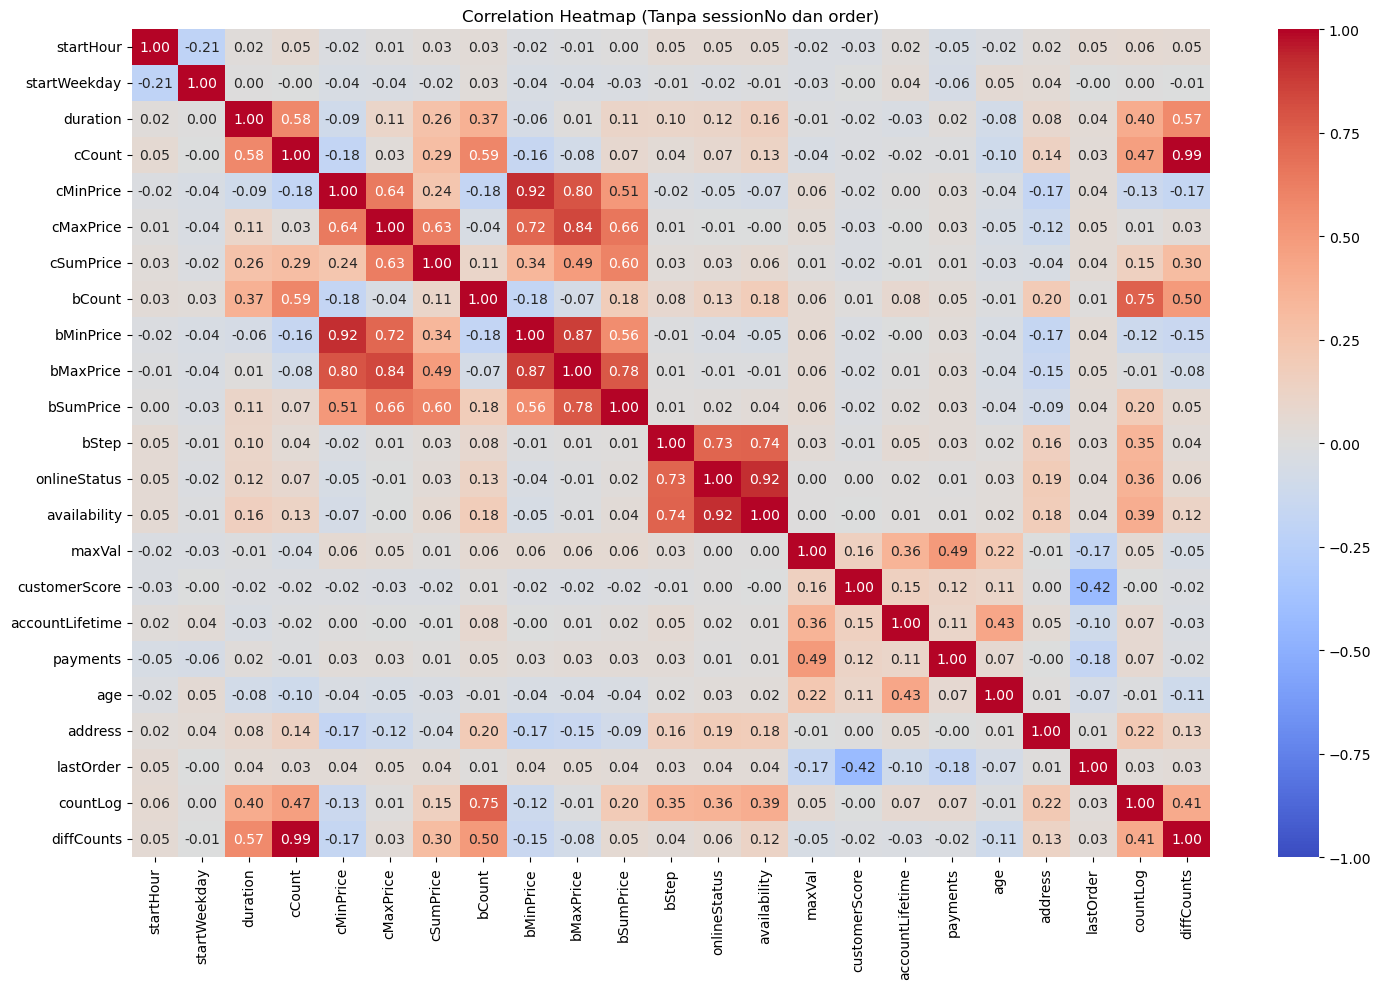

In [46]:
# Menghitung korelasi dan hanya memilih kolom selain 'sessionNo' dan 'order'
correlation_matrix = bySession.loc[:, ~bySession.columns.isin(['sessionNo', 'order'])].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Tanpa sessionNo dan order)')
plt.tight_layout()
plt.show()

- Korelasi Positif
  
    cCount dan diffcounts memiliki korelasi sangat tinggi ini mungkin karena diffcount adalah selisih dari jumlah produk yang di klik dengan jumlah produk yang dimasukkan ke keranjang

    onlineStatus n Avaibility memiliki korelasi 0.92 menunjukkan kemungkinan pelanggan yang online untuk memeriksa apakah pengiriman barangnya sedang berada di daerah mana. Keduanya juga cukup berkaitan dengan status bStep karena berkaitan dengan tahap pemrosesan pembelian, misalnya bStep adalah 4 karena barang sedang dalam pengiriman.

    cMinPrice dan bMinPrice,  cMaxPrice dan bMaxPrice, dan bSumPrice dengan korelasi antara 0.72 - 0.91 karena jumlah harga dari produk yang diklik berkaitan dengan jumlah harga dari produk yang ada di keranjang.

    bCount dan countLog 0.75 keduanya memiliki korelasi cukup erat karena bCount adalah berapa banyak log aktivitas pelanggan dalam setiap sesi kemungkinan memengaruhi banyaknya jumlah produk yang dimasukkan ke keranjang 

- Korelasi Negatif
  
    customerScore dan lastOrder memiliki korelasi -0.42 dimana semakin lama pelanggan tidak melakukan order (nilai lastOrder tinggi), maka customerScore cenderung menurun. Sebaliknya, pelanggan yang sering memesan baru-baru ini (lastOrder rendah) memiliki customerScore yang lebih tinggi.

    startWeekday dan startHours memiliki korelasi -0.21 dimana mungkin pelanggan yang sudah online dalam kurun Waktu lama dalam satu hari lebih jarang online di hari lain juga.

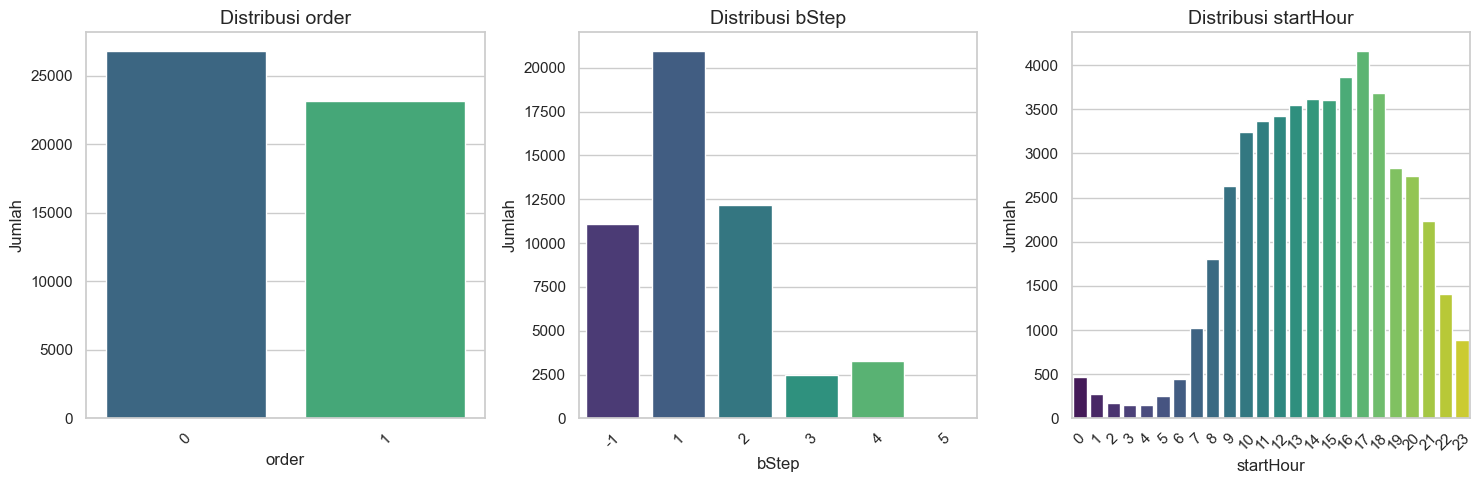

In [69]:
# Daftar kolom bertipe kategori
category_columns = ['order', 'bStep', 'startHour']

# Buat subplots
fig, axes = plt.subplots(1, len(category_columns), figsize=(15, 5))  # 1 baris, N kolom

# Loop untuk agregasi dan plot per kategori
for i, col in enumerate(category_columns):
    # Agregasi jumlah per kategori
    agg_data = bySession[col].value_counts().reset_index()
    agg_data.columns = [col, 'count']  # Rename kolom agar lebih jelas
    
    # Plot menggunakan Seaborn
    sns.barplot(ax=axes[i], data=agg_data, x=col, y='count', palette='viridis')
    axes[i].set_title(f'Distribusi {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Jumlah', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()


- order

Dari semua aktivitas di dapatkan lebih sedikit pelanggan yang melakukan order. Sebaliknya pelanggan yang tidak melakukan order lebih banyak ini mungkin karena banyak pelanggan yang hanya eksplorasi produk tanpa membeli. 

- bStep

Dapat disimpulkan mayoritas pelanggan hanya berada di tahap 1 yaitu login atau sekedar melihat produk atau aplikasi tanpa klik apapun. Sebaliknya sedikit pelanggan yang berada di tahap 5 yaitu pesanan selesai atau review pesanan. 

- startHour

Mayoritas pelanggan aktif pada sore hari sampai saat petang mulai pukul 16.00 sampai 18.00 ini diasumsikan pelanggan kebanyakan membuka aplikasi ketika pulang dari bekerja. Jarang ada pelanggan yang membuka aplikasi sebelum jan 6 pagi hari kemudian mulai naik di jam 8 pagi.

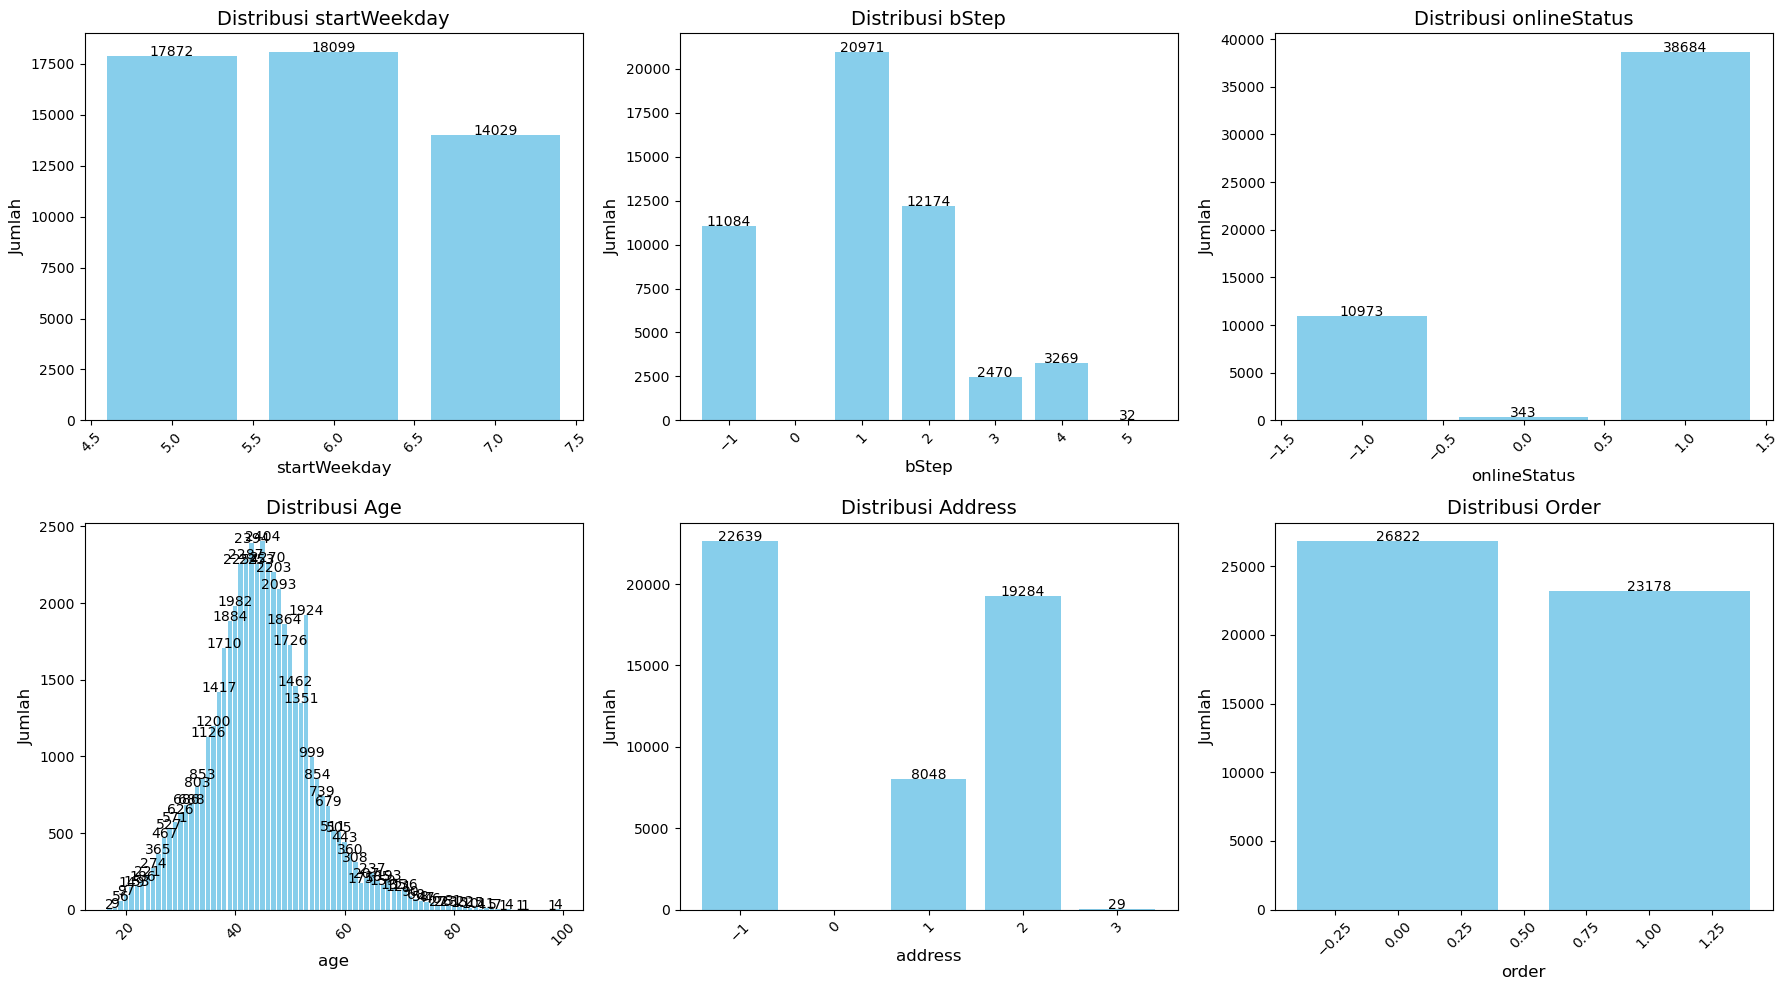

In [48]:
# Data agregasi untuk setiap kolom
agg_data_startWeekday = bySession['startWeekday'].value_counts().reset_index()
agg_data_startWeekday.columns = ['startWeekday', 'count']
agg_data_bStep = bySession['bStep'].value_counts().reset_index()
agg_data_bStep.columns = ['bStep', 'count']
agg_data_onlineStatus = bySession['onlineStatus'].value_counts().reset_index()
agg_data_onlineStatus.columns = ['onlineStatus', 'count']
agg_data_age = bySession['age'].value_counts().reset_index()
agg_data_age.columns = ['age', 'count']
agg_data_address = bySession['address'].value_counts().reset_index()
agg_data_address.columns = ['address', 'count']
agg_data_order = bySession['order'].value_counts().reset_index()
agg_data_order.columns = ['order', 'count']

# Daftar data dan judul untuk setiap plot
data_list = [
    (agg_data_startWeekday, 'startWeekday', 'count', 'Distribusi startWeekday'),
    (agg_data_bStep, 'bStep', 'count', 'Distribusi bStep'),
    (agg_data_onlineStatus, 'onlineStatus', 'count', 'Distribusi onlineStatus'),
    (agg_data_age, 'age', 'count', 'Distribusi Age'),
    (agg_data_address, 'address', 'count', 'Distribusi Address'),
    (agg_data_order, 'order', 'count', 'Distribusi Order')
]

# Menentukan ukuran grid berdasarkan jumlah plot (2 baris x 3 kolom)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Meratakan array axes untuk mempermudah iterasi

# Membuat plot untuk setiap data
for i, (data, x_col, y_col, title) in enumerate(data_list):
    bars = axes[i].bar(data[x_col], data[y_col], color='skyblue')
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel(x_col, fontsize=12)
    axes[i].set_ylabel('Jumlah', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotasi label x agar mudah dibaca
    
    # Menambahkan anotasi pada setiap bar
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{int(yval)}', 
                     ha='center', fontsize=10)

# Menyesuaikan tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()


- startWeekday:
Disini kami mengasumsikan dari dataset ini weekDay 5 sebagai hari Sabtu, 6 sebagai hari Minggu, dan 7 sebagai hari Senin. Kemungkinan banyak orang lebih sering aktif ketika hari weekend dibandingkan hari biasa khususnya di hari Senin yang mayoritas hari mulai bekerja. 

- bStep:
Dalam chart tersebut dapat disimpulkan mayoritas pelanggan hanya berada di status 1 yang diasumsikan berada di tahap login saja dan melihat-lihat barang (scroll) dan sedikit pelanggan yang berada di status 5 yang diasumsikan adalah tahap pesanan selesai dan memberikan review.

- onlineStatus:
Ini menunjukkan bahwa sebagian besar pengguna cenderung online saat data dicatat. Sehingga dataset berasal dari periode tertentu di mana aktivitas online lebih dominan (misalnya hari kerja atau jam sibuk). Selain itu, kemungkinan akses offline mungkin tidak terekam sepenuhnya dalam dataset.

- age:
Dalam chart tersebut, usia pelanggan terbanyak di rentang 40-50 tahun yang diasumsikan karena di rentang umur ini usia produktif yang mudah untuk melakukan pembelian barang. Sedangkan usia rentang pelanggan yang minoritas ada di usia < 20 tahun yang mana adalah anak-anak atau remaja dan > 80 tahun yang mana dalah para lansia.

- address:
Mayoritas pelanggan tidak memberikan penjelasan address sehingga statusnya null (-1). Namun, diluar itu berarti tujuan ke pelanggan wanita paling mendominasi dibandingkan dengan menuju pelanggan pria. Sedangkan tujuan ke perusahaan adalah yang paling sedikit dari semua pesanan.

- order:
Dari semua pesanan disimpulkan lebih banyak yang tidak sampai tahap pesanan selesai atau berarti tidak memesan barang dibandingkan dengan yang melakukan pesanan.


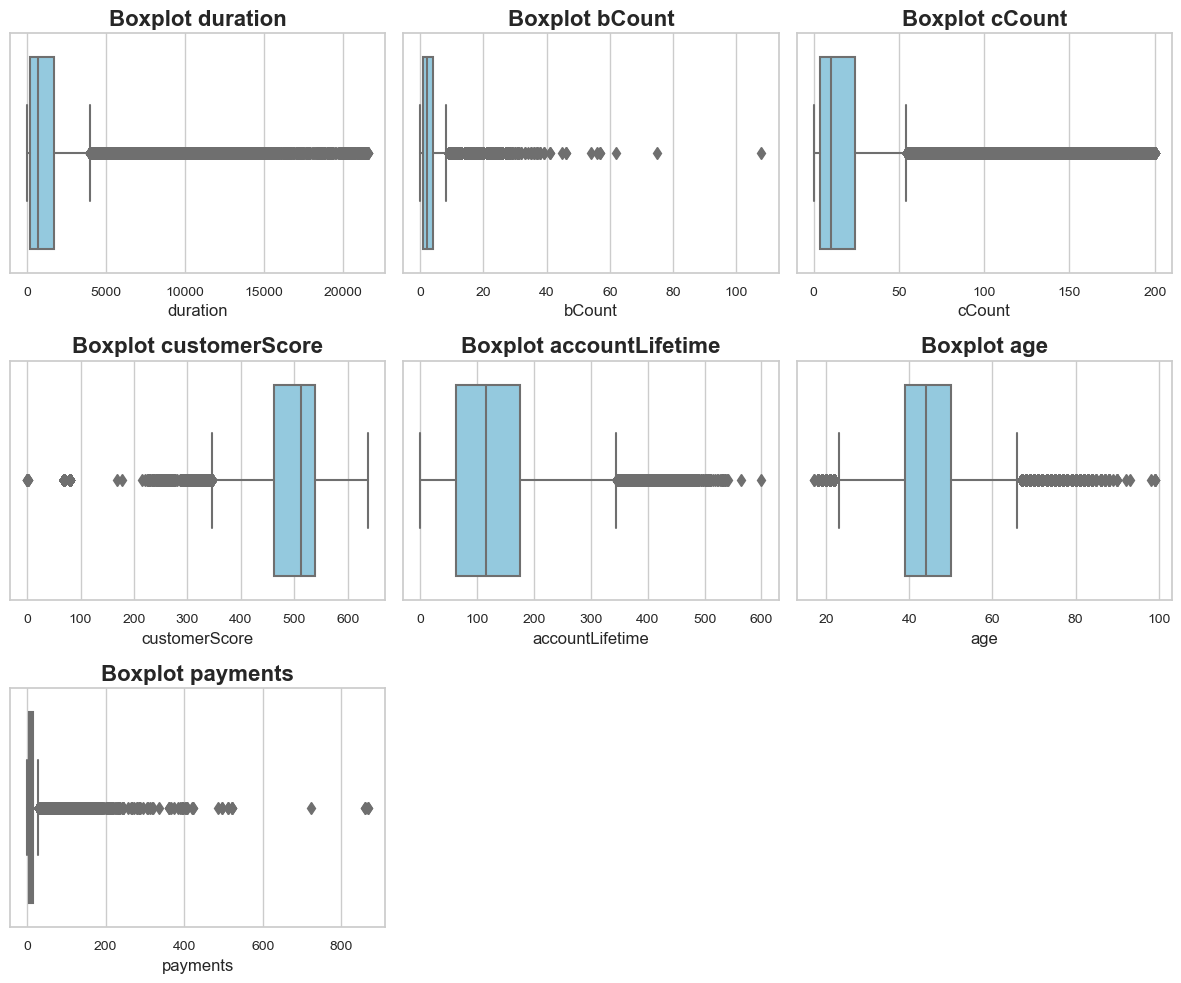

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom yang akan dianalisis
columns_to_plot = ['duration', 'bCount', 'cCount', 'customerScore', 'accountLifetime', 'age', 'payments']

# Menyiapkan style Seaborn yang lebih modern
sns.set(style="whitegrid", palette="muted")

# Menyiapkan figure dengan ukuran yang sesuai
plt.figure(figsize=(12, 10))

# Looping untuk membuat boxplot untuk masing-masing kolom
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Membuat subplot dengan grid 3x3
    sns.boxplot(data=bySession, x=column, color='skyblue', fliersize=6, linewidth=1.5)
    plt.title(f'Boxplot {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Menyesuaikan layout dan menunjukkan plot
plt.tight_layout()
plt.show()


- duration:
Durasi mayoritas data terpusat di nilai rendah, tetapi terdapat banyak nilai ekstrem. Ada banyak outlier jauh di kanan, yang dapat menjadi noise atau menunjukkan sesi durasi yang sangat Panjang bisa jadi akibat error.

- bCount:
Sebagian besar data bernilai rendah yaitu kurang dari 20 kali masuk ke keranjang, namun terdapat beberapa nilai tinggi yang lebih dari 60 kali. Data dengan nilai tinggi mungkin adalah pelanggan yang membeli dalam jumlah sangat besar atau hanya sebatas wishlist saja.

- cCount:
Sebagian besar data bernilai rendah yaitu kurang dari 50 kali klik produk, namun terdapat beberapa nilai tinggi yang lebih dari 50 kali klik produk. Ini mungkin karena user melakukan pembelian ekstrim atau hanya sedang eksplor produk.

- customerScore:
Mayoritas pelanggan memiliki skor sekitar 400–600, tetapi ada beberapa outlier rendah, yaitu kurang dari 100. Pelanggan dengan skor rendah kemungkinan tidak aktif atau memiliki kontribusi kecil pada bisnis.

- accountLifetime:
Sebagian besar nilai berada pada rentang moderat 100–200 bulan, tetapi ada outlier dengan lifetime panjang yaitu lebih dari 300. Pelanggan dengan akun lama lebih dari 300 bulan mungkin pelanggan loyal.

- age:
Usia pelanggan terkonsentrasi sekitar 20–60 tahun. Ada beberapa outlier ekstrem lebih dari 80 tahun. Outlier ini bisa mencerminkan kesalahan input data atau pengguna memang berada di usia tersebut. 

- payment:
Sebagian besar pelanggan memiliki pembayaran rendah kurang dari 200 yang mungkin kita asumsikandalam dollar, tetapi terdapat beberapa nilai tinggi yang lebih dari 600. Outlier tinggi mungkin pelanggan dengan pengeluaran sangat besar.

## Mengatasi outlier

In [67]:
from sklearn.preprocessing import RobustScaler

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Terapkan RobustScaler pada kolom tertentu (misalnya "duration")
bySession["duration"] = scaler.fit_transform(bySession[["duration"]])

# Jika ingin memproses banyak kolom
columns_to_scale = ["duration", "bCount"]  # Tambahkan kolom lainnya sesuai kebutuhan
bySession[columns_to_scale] = scaler.fit_transform(bySession[columns_to_scale])


Mengatasi outlier dengan teknik robust scaller

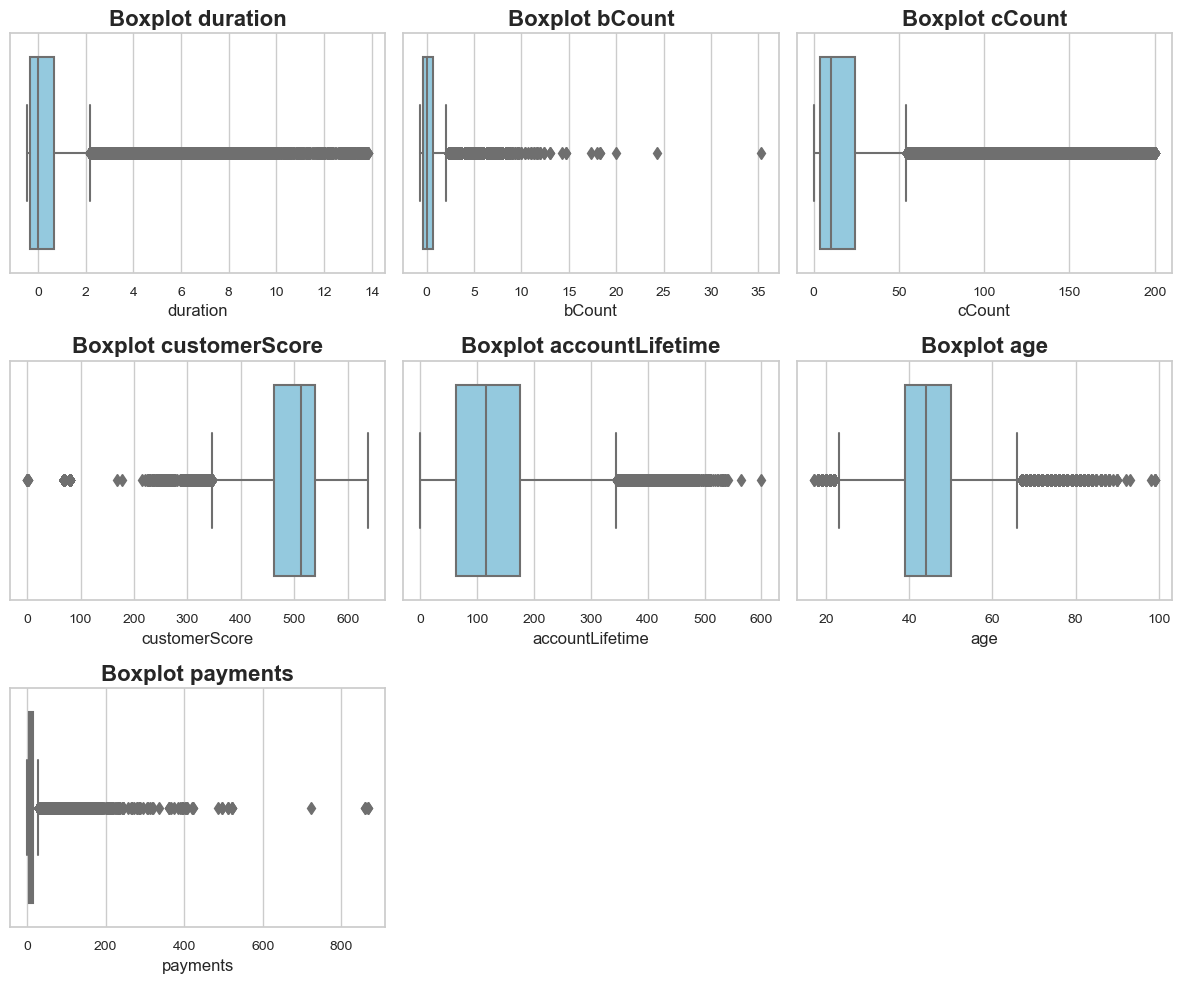

In [68]:
# Kolom yang akan dianalisis
columns_to_plot = ['duration', 'bCount', 'cCount', 'customerScore', 'accountLifetime', 'age', 'payments']

# Menyiapkan style Seaborn yang lebih modern
sns.set(style="whitegrid", palette="muted")

# Menyiapkan figure dengan ukuran yang sesuai
plt.figure(figsize=(12, 10))

# Looping untuk membuat boxplot untuk masing-masing kolom
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Membuat subplot dengan grid 3x3
    sns.boxplot(data=bySession, x=column, color='skyblue', fliersize=6, linewidth=1.5)
    plt.title(f'Boxplot {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Menyesuaikan layout dan menunjukkan plot
plt.tight_layout()
plt.show()


Penampakan boxplot setelah outlier diatasi

## One hot Encoding

In [53]:
# Daftar kolom kategori (kecuali 'order' karena itu merupakan output)
category_columns = ['onlineStatus', 'availability', 'bStep', 'startHour', 'startWeekday', 'address']

# Terapkan One Hot Encoding pada setiap kolom kategori menggunakan pd.get_dummies
bySession_encoded = pd.get_dummies(bySession, columns=category_columns, drop_first=False)

# Menampilkan hasil encoding
bySession_encoded.head()


,sessionNo,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,...,startHour_21,startHour_22,startHour_23,startWeekday_5,startWeekday_6,startWeekday_7,address_-1.0,address_1.0,address_2.0,address_3.0
0,1,-0.452003,1.0,59.99,59.99,59.990,-0.333333,59.99,59.99,59.99,...,0,0,0,1,0,0,0,1,0,0
1,2,-0.410431,0.0,30.99,33.99,48.976,-0.666667,30.99,30.99,30.99,...,0,0,0,1,0,0,1,0,0,0
2,3,-0.223734,11.0,9.99,29.99,109.950,0.000000,9.99,29.99,39.98,...,0,0,0,1,0,0,0,1,0,0
3,4,-0.449735,4.0,4.99,4.99,19.960,-0.333333,4.99,4.99,4.99,...,0,0,0,1,0,0,1,0,0,0
4,5,1.647014,45.0,12.99,179.95,1093.720,0.666667,19.99,27.85,103.54,...,0,0,0,1,0,0,0,1,0,0


In [54]:

# Daftar kolom kategori (kecuali 'order' karena itu merupakan output)
category_columns = ['onlineStatus', 'availability', 'bStep', 'startHour', 'startWeekday', 'address']

# Terapkan One Hot Encoding pada setiap kolom kategori menggunakan pd.get_dummies
bySession_encoded = pd.get_dummies(bySession, columns=category_columns, drop_first=False)

# Menampilkan total kolom dan nama-nama kolom setelah One Hot Encoding
print(f"Total kolom setelah One Hot Encoding: {bySession_encoded.shape[1]}")
print("Nama kolom setelah One Hot Encoding:")
print(bySession_encoded.columns.tolist())

Total kolom setelah One Hot Encoding: 67
Nama kolom setelah One Hot Encoding:
['sessionNo', 'duration', 'cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 'bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder', 'countLog', 'diffCounts', 'order', 'onlineStatus_-1.0', 'onlineStatus_0.0', 'onlineStatus_1.0', 'availability_-1.0', 'availability_1.0', 'availability_2.0', 'availability_3.0', 'availability_4.0', 'availability_5.0', 'availability_6.0', 'availability_7.0', 'bStep_-1', 'bStep_1', 'bStep_2', 'bStep_3', 'bStep_4', 'bStep_5', 'startHour_0', 'startHour_1', 'startHour_2', 'startHour_3', 'startHour_4', 'startHour_5', 'startHour_6', 'startHour_7', 'startHour_8', 'startHour_9', 'startHour_10', 'startHour_11', 'startHour_12', 'startHour_13', 'startHour_14', 'startHour_15', 'startHour_16', 'startHour_17', 'startHour_18', 'startHour_19', 'startHour_20', 'startHour_21', 'startHour_22', 'startHour_23', 'startWeekday_5', 'sta

Melakukan proses One Hot Encoding pada kolom kategori dalam DataFrame bySession. Pertama, kode menentukan kolom-kolom kategori yang perlu diubah, yaitu 'onlineStatus', 'availability', 'bStep', 'startHour', 'startWeekday', dan 'address'. Kolom-kolom ini kemudian diubah menjadi kolom baru yang masing-masing merepresentasikan kategori dengan nilai 0 atau 1, menggunakan fungsi pd.get_dummies(). Opsi drop_first=False memastikan bahwa semua kategori dipertahankan, tanpa menghilangkan satu kategori sebagai referensi. Setelah encoding selesai, kode menampilkan jumlah kolom baru yang terbentuk dan nama-nama kolom yang dihasilkan, memberikan gambaran tentang perubahan struktur DataFrame setelah proses encoding dilakukan.

In [56]:
# Export DataFrame ke file CSV
bySession_encoded.to_csv('bySession_encoded.csv', index=False)

In [61]:
bySession_encoded = pd.read_csv('bySession_encoded.csv', sep=',')

# Prediksi

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Memilih semua kolom kecuali 'order' untuk X
X = bySession_encoded.drop(columns=['order'])  # Menghapus kolom 'order' dari X
y = bySession_encoded['order']  # Menetapkan 'order' sebagai target variable (y)

# Bagi dataset secara stratified untuk menjaga distribusi kelas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print("\n")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print("\n")

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, log_reg_pred))
print(confusion_matrix(y_test, log_reg_pred))
print("\n")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors Results:")
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print("\n")

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      5364
           1       0.78      0.77      0.77      4636

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

[[4343 1021]
 [1079 3557]]


Random Forest Results:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      5364
           1       0.79      0.90      0.84      4636

    accuracy                           0.84     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.84      0.84     10000

[[4239 1125]
 [ 449 4187]]


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68      5364
           1       0.61      0.39      0.47      4636

    accuracy                           0.60     1

Berdasarkan hasil baru dari lima model (Decision Tree, Random Forest, Logistic Regression, K-Nearest Neighbors (KNN), dan XGBoost), berikut adalah pembaruan analisis performa masing-masing model:

- Model Decision Tree memiliki akurasi 79%, dengan nilai precision dan recall yang hampir seimbang untuk kedua kelas. Untuk kelas 0 (tidak ada pembelian), recall adalah 0.81, sedangkan untuk kelas 1 (pembelian), recall adalah 0.77. Hal ini menunjukkan bahwa model ini memiliki kemampuan yang baik dalam mengidentifikasi kategori yang benar. Namun, recall yang sedikit lebih rendah untuk kelas 1 menunjukkan potensi kekurangan dalam mendeteksi pembelian dibandingkan model lain yang lebih baik.

- Random Forest menghasilkan performa yang sangat baik, dengan akurasi mencapai 84%. Recall untuk kelas 1 (pembelian) adalah 0.90, menunjukkan kemampuan yang kuat untuk mendeteksi pembelian. Precision untuk kelas 0 juga tinggi di 0.90, yang berarti model ini sangat akurat dalam memprediksi tidak ada pembelian. Performa f1-score untuk kedua kelas adalah 0.84, menjadikan Random Forest salah satu model yang direkomendasikan karena keseimbangan antara precision, recall, dan akurasi.

- Logistic Regression menghasilkan akurasi yang rendah, yaitu 60%. Model ini lebih baik dalam mendeteksi kelas 0 (tidak ada pembelian) dengan recall 0.78, tetapi kinerjanya jauh lebih buruk untuk kelas 1 (pembelian), dengan recall hanya 0.39. Precision untuk kelas 1 adalah 0.61, namun tidak cukup untuk mengimbangi recall yang rendah. Model ini tidak optimal untuk mendeteksi pembelian dan kurang direkomendasikan.

- KNN memiliki akurasi yang sama dengan Logistic Regression, yaitu 60%, namun dengan performa precision dan recall yang tidak seimbang. Recall untuk kelas 1 adalah 0.59, sedangkan precision hanya 0.57. Hal ini menunjukkan bahwa model ini tidak cukup efektif untuk mendeteksi pembelian atau tidak ada pembelian secara konsisten, sehingga kurang direkomendasikan.

- XGBoost menunjukkan performa terbaik di antara semua model dengan akurasi 85%, yang sama dengan Random Forest. Recall untuk kelas 1 adalah 0.90, yang sebanding dengan Random Forest, namun precision untuk kelas 0 sedikit lebih rendah di 0.90 dibandingkan Random Forest. Hal ini menunjukkan bahwa XGBoost unggul dalam mendeteksi pembelian (kelas 1), menjadikannya model yang sangat efektif untuk skenario ini.

## Kesimpulan

XGBoost dan Random Forest adalah model terbaik, dengan akurasi 85% dan keseimbangan precision serta recall untuk kedua kelas. Namun, meminimalkan false negatives (kesalahan dalam mendeteksi pembelian). Sedangkan Logistic Regression dan KNN tidak direkomendasikan karena akurasi dan recall yang rendah, terutama dalam mendeteksi pembelian (kelas 1).